In [1]:
#Machine learning model to predict stock market price of google

In [10]:
#1.import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#2.load the dataset
dataset_train=pd.read_csv("EW-MAX.csv.xls")
dataset_train.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [12]:
#3.to train the model using stock price column
training_set=dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[  3.8125  ]
 [  4.125   ]
 [  4.      ]
 ...
 [112.029999]
 [112.459999]
 [112.300003]]
(4392, 1)


In [13]:
#4.normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.00437775],
       [0.00703093],
       [0.00596966],
       ...,
       [0.92316384],
       [0.92681462],
       [0.92545622]])

In [14]:
#5.creating x_train and y_train data structures.
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [15]:
#6.reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [18]:
#7.building the odel by importing the crucial libraries and adding different layers to LSTM
!pip install keras
!pip install tensorflow
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 29s 143ms/step - loss: 2.1028e-04
Epoch 2/100
38/38 [==============================] - 5s 137ms/step - loss: 3.3160e-05
Epoch 3/100
38/38 [==============================] - 5s 136ms/step - loss: 2.5108e-05
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 2.2429e-05
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 2.1705e-05
Epoch 6/100
38/38 [==============================] - 5s 128ms/step - loss: 3.5179e-05
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 2.2090e-05
Epoch 8/100
38/38 [==============================] - 5s 129ms/step - loss: 1.7379e-05
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 2.1114e-05
Epoch 10/100
38/38 [==============================] - 5s 135ms/step - loss: 1.7353e-05
Epoch 11/100
38/38 [==============================] - 5s 144ms/step - loss: 1.4995e-05
Epoch 12/100
38/38 [==============================]

In [21]:
dataset_test=pd.read_csv("EW-MAX.csv.xls")
actual_stock_price=dataset_test.iloc[:,1:2].values

In [22]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predicted_stock_price=regressor.predict(x_test)
predicted_stoc_price=scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 4s 4s/step


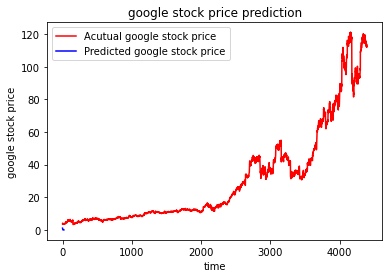

In [24]:
plt.plot(actual_stock_price,color='red',label='Acutual google stock price')
plt.plot(predicted_stock_price,color='blue',label='Predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()